## SeqBreed: a python tool to evaluate genomic prediction in complex scenarios

### Miguel Perez-Enciso  (miguel.perez@uab.es)

#### With contributions from:
Laura M Zingaretti (m.lau.zingaretti@gmail.com), Lino Ramirez-Ayala (linocesar.ramirez@cragenomica.es)


**SeqBreed is a general python3 software to simulate populations under genomic selection.** 
It inherits most of funcionality from SBVB (https://github.com/miguelperezenciso/sbvb1, doi:10.1534/g3.118.200942) software but is much more user friendly and adds numerous new features such as easy selection implementation or plots.

Its original target is to simulate genomic selection experiments but can be used as well to study the performance of GWAS or in general study the dynamics of complex traits under numerous selective scenarios: mass selection, BLUP, GBLUP and single step GBLUP are currently implemented.

It can accommodate any number of complex phenotypes controlled by an arbitrary number of loci (epistasis is not currently implemented though). Both strict autopolyploid and strict allopolyploid genomes can be considered.

### Main features: 
- Any number of traits.
- Any number of QTNs, trait specific.
- Any number of additive and dominant effects.
- Computes genomic relationship matrices for any number of SNP arrays simultaneously.
- It allows for polyploids
- Any number of chromosomes, allows for sex, MT chromosomes and varying local recombination rates, that can be sex specific.
- GWAS and PCA plots on arbitrary SNP sets
- Allows general study the dynamics of complex traits under numerous selective scenarios: mass selection, BLUP, GBLUP and single step GBLUP are currently implemented.
- Easy implementation of selection cycles with several evaluation criteria
- ...

In [1]:
# Requirements
# scipy
# numpy
# pandas
# os
# sys
# cython
# seaborn
# matplotlib
# scilearn
# statsmodels

# sudo python3 -m pip install scipy
# sudo python3 -m pip install numpy
# sudo python3 -m pip install pandas
# sudo python3 -m pip install os
# sudo python3 -m pip install sys
# sudo python3 -m pip install seaborn
# sudo python3 -m pip install gzip
# sudo python3 -m pip install pickle
# sudo python3 -m pip install matplotlib
# sudo python3 -m pip install scilearn
# sudo python3 -m pip install statsmodels

In [2]:
# INSTALL
# clone repository
# sudo python3 -m pip install SeqBreed-XXX.whl (From local)

### Input

- SeqBreed.py minimally requires:
    * Genotype file in vcf format (https://en.wikipedia.org/wiki/Variant_Call_Format).
    
- Optionally:
    * File with (sex) specific recombination maps: sex and mitochondrial chromosomes can be specified. Auto polyploid genomes can also be specified.
    * A starting pedigree.
    * A file with causal SNPs and their effects on each trait
    * One or more lists of SNPs for each genotyping chip(s)


### Usage: test example

In [15]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import os
import copy
from SeqBreed import genome as gg
from SeqBreed.selection import selection as sel

### Modify folder and file names to suit your data

In [23]:
#--> some folders
# input file directory 
ddir=os.getcwd()
# working directory
wdir=ddir # or choose an empty new one

#--> Input files
# pedigree file
pedfile = ddir+'/test.ped'
# List of files with SNP posiitons from two chips, sequence can be included from seqfile (see below)
chipfiles = [ ddir+'/chr1.pos',  ddir+'/chip2.pos'] 
# contains qtn positions only
qtnfile1 = ddir+'/qtn1.pos'
# contains qtn positions and effects for two phenotypes
qtnfile2 = ddir+'/qtn2.pos'
# recombination map file
mapfile = ddir+'/map.txt'
# snp file in vcf format
vcffile = ddir+'/f.vcf.gz'

# goto working directory
os.chdir(wdir)

# seqfile contains snp positions from vcf (to be generated in next step)
seqfile = 'seq.pos'


In [17]:
# uploads genotypes and generates snp positions
gbase = gg.GFounder(vcfFile=vcffile, snpFile=seqfile)

ploidy: 2
N base: 65
N snps: 187


In [18]:
# no. of founder individuals and ploidy
print(gbase.nbase)
print(gbase.ploidy)

65
2


In [19]:
# generates Genome object with chr names, recombination map, etc
# 'X, 'Y' and 'MT' are keywords to specify sex and mt chrs, if present. 
# The chr name used in vcf is the one to be used
# requires snpFile generated in previous step, which simply stores snp positions
gfeatures = gg.Genome(snpFile=seqfile, mapFile=mapfile, ploidy=gbase.ploidy,  XChr='X', YChr='Y', MTChr='MT')

In [20]:
# prints some basic info
gfeatures.print()

GENOME FEATURES (ploidy = 2)
Chr  Type   bplength    Nsnps length_m length_f
1  Autos  4507452 88 [0.044576951704790146, 0.04457485568672105]
10  Autos  78614306 99 [0.7821531605816539, 0.78214306]
All        83121758  187 [0.82673011 0.82671792]



### QTNs can be generated in several ways
* read or simulate qtn information
* h2 MUST be an array with dimension number of traits 

In [24]:
# OPTION 1: A random number of nqtn=20 additive qtls genome wide distributed,
# additive effects are sampled from a gamma, valid only for one phenotype
qtn1 = gg.QTNs(h2=[0.5], genome=gfeatures, nqtn=10)

QTN file  does not exist or not specified!
QTN effects and positions randomly sampled


In [25]:
# OPTION 2: only qtn positions are read from qtnFile, no genetic effects in qtnFile
# add effects are sampled form a gamma
# h2 should be an array with dimension one, valid only for one phenotype
qtn2 = gg.QTNs(h2=[0.5], genome=gfeatures, qtnFile=qtnfile1)

ULL: no qtn effects defined in qtnFile and to be simulated from gamma


In [26]:
# OPTION 3: qtn positions and effects are read from qtnFile
# h2 should be an array with dimension # of effects, here two effects of h2 0.5 & 0.3
qtn3 = gg.QTNs(h2=[0.5, 0.3], genome=gfeatures, qtnFile=qtnfile2)

#h2 by trait 0.5
#se undefined
10 76435075 0.008 0.0013903228941866774 0.0 2.9509669794420225e-08 0.0
10 76773395 0.008 -0.2531101653398094 0.0 0.0009780299997617266 0.0
10 77100548 0.385 0.1011482228913721 0.0 0.0048430594054829305 0.0
10 77324298 0.554 0.00577729364460845 0.0 1.6495013120804092e-05 0.0
10 77391366 0.023 0.03403207075022133 0.0 5.222097998435677e-05 0.0
10 77392054 0.338 0.5874654132157957 0.0 0.15454644671794845 0.0




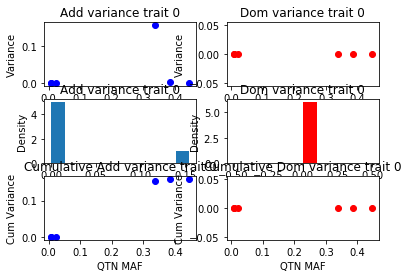

In [27]:
# For the remaining, let us assume we use qtn2
qtn = copy.deepcopy(qtn2)

# get add and dom variance per locus, assuming equilibrium
qtn.get_var(gfeatures,gbase)

# print and plot main qtn features
qtn.print(gfeatures)
print()
qtn.plot()

In [ ]:
### Chipfiles can also be generated in several ways
* chipfiles contains list of chips 
* sequence is an additional chip 
* The next example shows how to generate chip objects 

In [11]:
# sequence is just another chip with all positions, seqfile contains vcf positions
chipfiles.append(seqfile)

# OPTION 1: generate chip objects from predefined lists of positions
chips = []
for file in chipfiles:
    chip = gg.Chip(chipFile=file, genome=gfeatures, name=file+'_chip')
    chips.append(chip) # chips is a list containing all chips

# chips can also be generated from equally spaced SNPs or randomly
# OPTION 2: here the program generates a chip with 10 equally spaced SNPs with MAF>0.10
chip = gg.Chip(gfeatures, gbase, nsnp=10, unif=True, minMaf=0.1, name='chip_')
chips.append(chip)

# OPTION 3: or with 30 randomly spaced SNPs, any MAF
chip = gg.Chip(gfeatures, gbase, nsnp=30, unif=False, name='chip_')
chips.append(chip)

# prints chip summary
for chip in chips:
    chip.print(gfeatures) 

CHIP FEATURES /home/miguel/PycharmProjects/sbvb/test/chip1.txt_chip
Chr	Nsnps	First posns ... Last
1	12		574037 796445 985857 2912915 3019705 ... 3539284
10	8		76085519 76435075 76773395 77100548 77324298 ... 77673767
All 20


CHIP FEATURES /home/miguel/PycharmProjects/sbvb/test/chip2.txt_chip
Chr	Nsnps	First posns ... Last
1	13		2548176 2816685 3034045 3093658 3205508 ... 4237238
10	17		76328247 76592802 76646882 76668634 77084251 ... 78614306
All 30


CHIP FEATURES gfeature.txt_chip
Chr	Nsnps	First posns ... Last
1	88		253230 342481 547671 548397 574037 ... 4507452
10	99		75143812 75168060 75591000 75631917 75648459 ... 78614306
All 187


CHIP FEATURES chip_unif
Chr	Nsnps	First posns ... Last
1	6		253230 2540247 3007286 3520202 3804104 ... 4199433
10	5		76586207 77116769 77441988 77813185 78312200 ... 78312200
All 11


CHIP FEATURES chip_random
Chr	Nsnps	First posns ... Last
1	12		2172489 2912915 2957778 3055534 3205508 ... 4170607
10	18		75168060 76156630 76373320 76428252 76773395 

### Generating genomes through pedigree
* Here genotypic values and phenotypes are generated for all indivs in pedfile
* This step also computes enviromental variance (VE) using actual genotypes found in the base population


In [45]:
pop = gg.Population(gfeatures, pedFile=None, qtns=qtn, gfounders=gbase)
print('No. of individuals is '+str(len(pop.inds)))

No. of individuals is 65


In [46]:
# Indiv and pop info can be accessed
pop.print('pop.out')          # prints pop info in file 'pop.out'
qtn.print(gfeatures)          # prints qtn info again, now contains standard environmental deviation (se)
pop.inds[-1].print(gfeatures) # prints summary of last individual, incl recombination blocks

#h2 by trait 0.5
#se by trait 0.5096646520033327
#CHR POS FRQ ADD_0 DOM_0 VA_0 VD_0
10 76435075 0.008 0.0013903228941866774 0.0 2.9509669794420225e-08 0.0
10 76773395 0.008 -0.2531101653398094 0.0 0.0009780299997617266 0.0
10 77100548 0.385 0.1011482228913721 0.0 0.0048430594054829305 0.0
10 77324298 0.554 0.00577729364460845 0.0 1.6495013120804092e-05 0.0
10 77391366 0.023 0.03403207075022133 0.0 5.222097998435677e-05 0.0
10 77392054 0.338 0.5874654132157957 0.0 0.15454644671794845 0.0

Ind Parents sex: 65 0 0  1
Y  g_add  g_dom: 0.2087885122639888 -0.36977764152039433 0.0
 Chr 1
   Pos [4507452]
   ori [128]
   Isnp [88]
   Pos [4507452]
   ori [129]
   Isnp [88]
 Chr 10
   Pos [78614306]
   ori [128]
   Isnp [99]
   Pos [78614306]
   ori [129]
   Isnp [99]




In [47]:
# v is an array containing y, add_value, dom_value and ebvb for each indiv
v = pop.ivalues()
# first 10 inds
print('y, add_value, dom_value, ebvb')
print(v[:10,:])

# the current pedigree in a pop.n x 3 array can be generated as
ped = pop.ped()
print('\nLast 10 individuals')
print(ped[-10:,:])

y, add_value, dom_value, ebvb
[[ 0.75319383  0.11653955  0.11653955         nan]
 [ 0.02602722 -0.47670316 -0.47670316         nan]
 [ 0.56999173  0.9120787   0.9120787          nan]
 [-1.18815644 -0.47670316 -0.47670316         nan]
 [-0.3484147  -0.47670316 -0.47670316         nan]
 [-0.35379635 -0.47670316 -0.47670316         nan]
 [-0.24744302 -0.47670316 -0.47670316         nan]
 [ 0.75384256  0.21768777  0.21768777         nan]
 [-0.8261273  -0.47670316 -0.47670316         nan]
 [-0.03384239  0.11653955  0.11653955         nan]]

Last 10 individuals
[[56  0  0]
 [57  0  0]
 [58  0  0]
 [59  0  0]
 [60  0  0]
 [61  0  0]
 [62  0  0]
 [63  0  0]
 [64  0  0]
 [65  0  0]]


In [48]:
# pop.addRandomInd function adds a randomly generated individual 
# Perez-Enciso et al. http://www.genetics.org/content/205/2/939.long, page 949)
# mode can be 'pedigree' or 'random'
# k specifies number of recombination generations
# this option can be used to artificially increase number of founders
print(pop.n)
pop.addRandomInd(gfeatures, gbase.nbase, k=5, mode='pedigree', qtns=qtn, gfounders=gbase)
print(pop.n)

65
66


In [49]:
# pop.addInd function adds offspring of parents 
id_papa = 23  # father is the 24th individual
id_mama = 0   # mother is the first individual
id_sex = 0    # it is boy (1 for a girl)
id = pop.n+1  # the id will be population size plus one
parents = [pop.inds[id_papa], pop.inds[id_mama]]
print(pop.n)
pop.addInd(parents, gfeatures, id=id, sex=id_sex, qtns=qtn, gfounders=gbase)
print(pop.n)
# the new individual can be accessed at position pop.n - 1 (which has been automatically updated)
pop.inds[pop.n-1].print(gfeatures)
# the same as
pop.inds[-1].print(gfeatures)

66
67
Ind Parents sex: 67 24 1  0
Y  g_add  g_dom: 0.2185845809209261 0.12231684244863776 0.0
 Chr 1
   Pos [4507452]
   ori [47]
   Isnp [88]
   Pos [4507452]
   ori [1]
   Isnp [88]
 Chr 10
   Pos [65761382 78614306]
   ori [46 47]
   Isnp [ 0 99]
   Pos [78614306]
   ori [0]
   Isnp [99]


Ind Parents sex: 67 24 1  0
Y  g_add  g_dom: 0.2185845809209261 0.12231684244863776 0.0
 Chr 1
   Pos [4507452]
   ori [47]
   Isnp [88]
   Pos [4507452]
   ori [1]
   Isnp [88]
 Chr 10
   Pos [65761382 78614306]
   ori [46 47]
   Isnp [ 0 99]
   Pos [78614306]
   ori [0]
   Isnp [99]




### Generating molecular data

In [34]:
# generates genotype matrix X (nsnp x nind) for individuals second to 26th
# for snp positions in first chip and using only markers with maf > 0.09
X = gg.do_X(pop.inds[1:25], gfeatures, gbase, chip=chips[0], minMaf=0.09)

In [35]:
# first genotypes 
X[0:3,:10]

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 2., 1., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### 2D PCA and GWAS 
* can be used to inspect molecular data and association signals



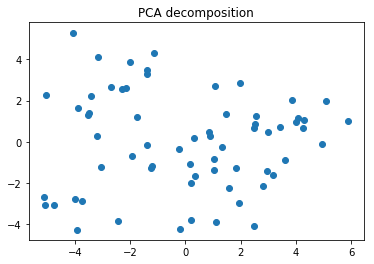

[[ 3.85383758  2.04747463]
 [ 3.59325824 -0.8646801 ]
 [-1.9258014  -0.68423814]
 [ 5.10775177  2.00220492]
 [ 1.34549122 -0.24487478]
 [ 3.43945247  0.7213944 ]
 [ 2.46948689 -4.11400109]
 [ 0.19081264 -3.79392851]
 [ 1.92767972 -2.9912052 ]
 [ 4.09032796  1.17609932]]


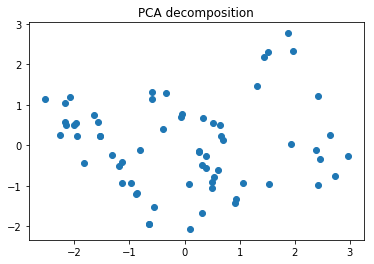

In [40]:
# Returns 2D PCA using sequence data (third chip)
X1 = gg.do_X(pop.inds, gfeatures, gbase, chip=chips[2])
pca = sel.Pca(X1)
pca.fit()
pca.plot()
pca.plot(plotFile='pca.pdf') # PCA in pdf file

# PCA values can be accessed as (eg for first 10 indivs)
print(pca.p[:10,:])

# Compare PCA with usinng last chip
X2 = gg.do_X(pop.inds, gfeatures, gbase, chip=chips[-1])
pca = sel.Pca(X2)
pca.fit()
pca.plot()

### Implementing GWAS

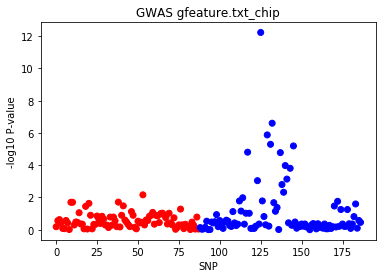

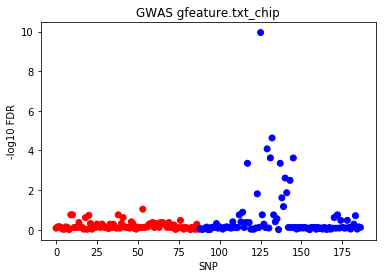

In [43]:
# by default, first phenotype
gwas = sel.Gwas(X1, chips[2])
gwas.fit(inds=pop.inds, trait=0)   
gwas.plot()         # plots pvalue
gwas.plot(fdr=True) # plots FDR

### SELECTION
Implementing selection in cycles 


In [62]:
# current pop is saved as pop0
pop0 = copy.deepcopy(pop)

# First let us specify selection intensity
nsel = [5, 10]   # no. of males and females selected per generation
noffspring = 10  # no of offspring per female

### Example 1: Mass selection


Mass selection
Generation, N: 0 65
Generation, N: 1 165
Generation, N: 2 265
Generation, N: 3 365
Generation, N: 4 465


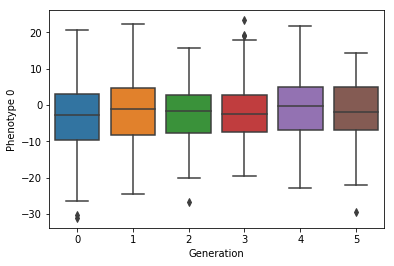

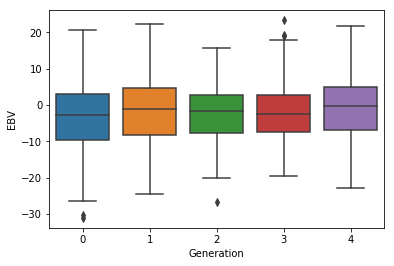

In [63]:
# Example 1: phenotypic selection, discrete generations, assortative mating, data kept in memory
print('\nMass selection')
pop = copy.deepcopy(pop0) # init pop
for t in range(ngen):
    print('Generation, N: ' + str(t) + ' ' + str(len(pop.inds)))
    # step 1: do evaluation, adds ebv to pop.inds[:].ebv
    sel.doEbv(pop, criterion='phenotype')
    # step 2: pedigree with offspring of selected individuals
    newPed = sel.ReturnNewPed(pop, nsel, famsize=noffspring, mating='random',  generation=0)
    # step 3: generates new offspring (this function adds QTN genotypes, true bvs and y)
    pop.addPed(newPed, gfeatures, qtn, gbase)

pop.plot() # plots phenotypes
pop.plot(ebv=True) # EBVs of last generation are missing


### Example 2: GBLUP using chip[0], continuous generation (up to a point)


GBLUP selection
generation 0 65
generation 1 165
generation 2 265
generation 3 365
generation 4 465


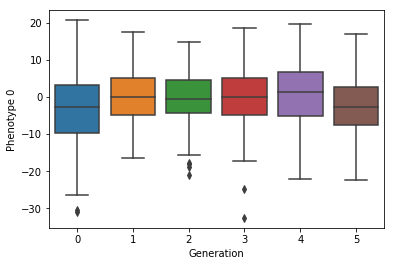

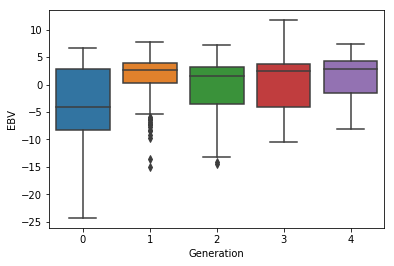

In [64]:
# Example 2: GBLUP using chip[0], continuous generations
print('\n'+'GBLUP selection')
pop = copy.deepcopy(pop0) # init pop
for t in range(ngen):
    print('generation ' + str(t) + ' ' + str(len(pop.inds)))
    # step 0: generate marker data for evaluation
    X = gg.do_X(pop.inds, gfeatures, gbase, chips[0], minMaf=1e-6)
    sel.doEbv(pop, criterion='gblup', X=X, h2=0.3, nh=gfeatures.ploidy)
    # step 2: pedigree with offspring of selected individuals
    newPed = sel.ReturnNewPed(pop, nsel, famsize=noffspring, mating='random',  generation=0)
    # step 3: generates new offspring (this function adds QTN genotypes, true bvs and y)
    pop.addPed(newPed, gfeatures, qtn, gbase)

# Check response: plot phenotype and EBV by generation
pop.plot()
pop.plot(ebv=True) # some EBVs can be missing


### Example 3: BLUP evaluation when last 10 individuals have no phenotypes

In [65]:
#--> Example 3: BLUP evaluation when last 10 individuals have no phenotypes
print('\n'+'BLUP evaluation with missing phenotypes')

# phenotyped individuals (all but last 10)
yids = np.arange(pop.n-10, dtype=np.int)

# BLUP for first phenotype (default)
itrait = 0
sel.doEbv(pop, criterion='blup', yIds=yids, h2=0.3, itrait=itrait)

# EBVs and additive genetic values of individuals with missing phenotypes
ebv_blup_miss = np.array(list(pop.inds[i].ebv for i in range((pop.n-10),pop.n)))
g_add_miss = np.array(list(pop.inds[i].g_add[itrait] for i in range((pop.n-10),pop.n)))

print("Corr EBV, TBV = %s" % np.corrcoef(ebv_blup_miss, g_add_miss)[0,1])


BLUP evaluation with missing phenotypes
Corr EBV, TBV = 0.16035674514745465


### Example 4: Single Step evaluation using sequence(chip[2]) assuming last half of population is genotyped


In [66]:
#--> Example 4: Single Step evaluation using sequence(chip[2]) assuming last half of population is genotyped
print('\n'+'Single Step evaluation')
# genotyped individuals (last half)
nind = len(pop.inds)
mkrids = np.arange(nind//2,nind, dtype=np.int)

# get mkr data from genotyped individuals
X = gg.do_X([pop.inds[i] for i in mkrids], gfeatures, gbase, chips[2], minMaf=1e-6)

# SS evaluation
sel.doEbv(pop, criterion='sstep', X=X, mkrIds=mkrids, h2=0.3, nh=gfeatures.ploidy, itrait=itrait)

# extract EBVs & phenotypes
ebv_sstep = np.array(list(pop.inds[i].ebv for i in range(pop.n)))
y = np.array(list(pop.inds[i].y[itrait] for i in range(pop.n)))
g_add = np.array(list(pop.inds[i].g_add[itrait] for i in range(pop.n)))


Single Step evaluation


Correlation btw SStep and BLUP EBVs = 0.8311362103234863
Correlation btw BLUP EBVs and y = 0.770373896204115
Correlation btw SStep EBVs and y = 0.851179941850488
Correlation btw BLUP EBVs and g_add = 0.7659192889235072
Correlation btw SStep EBVs and g_add = 0.6484010758834275


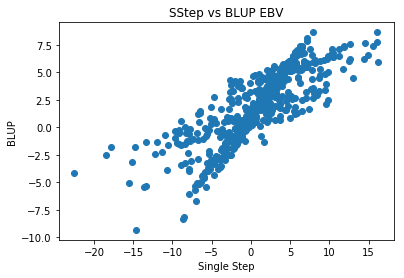

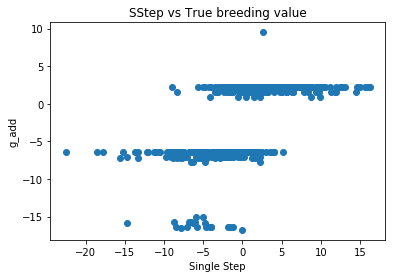

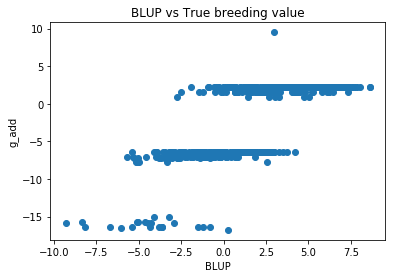

In [67]:
# correlation between BLUP and SSTEP evaluation
sel.doEbv(pop, criterion='blup', h2=0.3, itrait=itrait) # get blup ebv
ebv_blup = np.array(list(pop.inds[i].ebv for i in range(pop.n)))
print('Correlation btw SStep and BLUP EBVs = ' + str(np.corrcoef(ebv_sstep, ebv_blup)[1,0]))
print('Correlation btw BLUP EBVs and y = ' + str(np.corrcoef(ebv_blup, y)[1,0]))
print('Correlation btw SStep EBVs and y = ' + str(np.corrcoef(ebv_sstep, y)[1,0]))
print('Correlation btw BLUP EBVs and g_add = ' + str(np.corrcoef(ebv_blup, g_add)[1,0]))
print('Correlation btw SStep EBVs and g_add = ' + str(np.corrcoef(ebv_sstep, g_add)[1,0]))

# plots
plt.scatter(ebv_sstep, ebv_blup)
plt.title('SStep vs BLUP EBV')
plt.xlabel('Single Step')
plt.ylabel('BLUP')
plt.show()
plt.close()

plt.scatter(ebv_sstep, g_add)
plt.title('SStep vs True breeding value')
plt.xlabel('Single Step')
plt.ylabel('g_add')
plt.show()
plt.close()

plt.scatter(ebv_blup, g_add)
plt.title('BLUP vs True breeding value')
plt.xlabel('BLUP')
plt.ylabel('g_add')
plt.show()
plt.close()

In [69]:
#--> Appendix

# determine env variance using a subset (or not of individuals)
qtn.set_se(pop.inds[10:gbase.nbase])

qtn.print(gfeatures)

#h2 by trait 0.5
#se by trait 7.133451936994401
#CHR POS FRQ ADD_0 DOM_0 VA_0 VD_0
10 76435075 0.008 -0.0025193556141806478 0.0 9.689736090896542e-08 0.0
10 76773395 0.008 7.906341016628429 0.0 0.9542981594068066 0.0
10 77100548 0.385 -8.663941660045706 0.0 35.53320004197659 0.0
10 77324298 0.554 5.686414172143123e-10 0.0 1.5980146559614086e-19 0.0
10 77391366 0.023 -0.8404000438788035 0.0 0.03184493740346977 0.0
10 77392054 0.338 -0.6438891862030309 0.0 0.18565928841055837 0.0

